# Examen Junio 2024

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn


[notice] A new release of pip is available: 23.3.2 -> 24.1.1
[notice] To update, run: C:\Users\jorda\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.1.1
[notice] To update, run: C:\Users\jorda\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.1.1
[notice] To update, run: C:\Users\jorda\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.1.1
[notice] To update, run: C:\Users\jorda\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


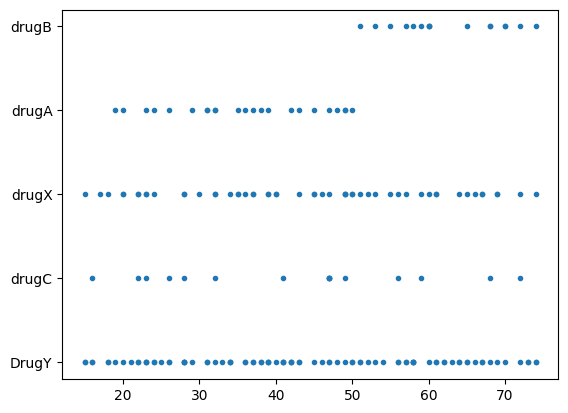

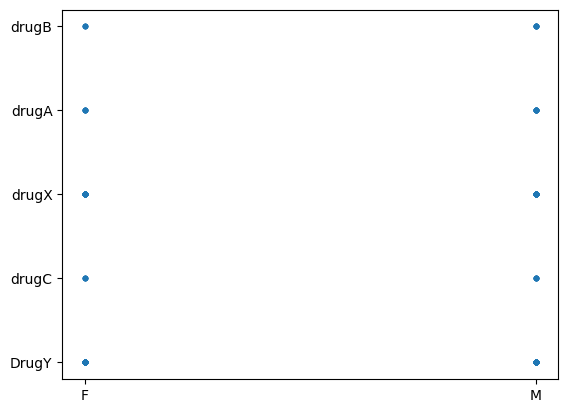

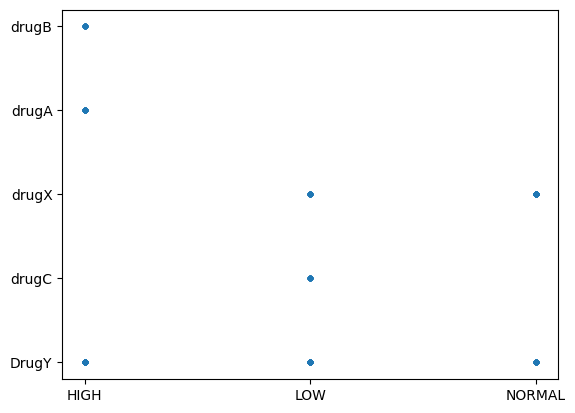

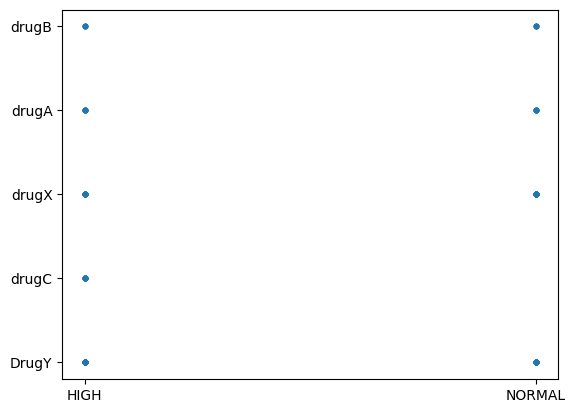

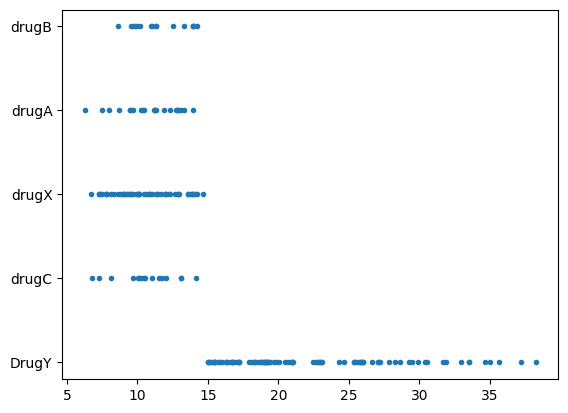

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drugs = pd.read_csv('drug200.csv')
drugs = drugs.dropna() #Limpiamos datos inválidos

#Mantenemos campo droga para realizar el entrenamiento posteriormente
data = drugs.to_numpy()
x=data[:,0] # Edad
y=data[:,5]
plt.scatter(x, y, marker = '.')
plt.show()
x=data[:,1] # Sexo
y=data[:,5]
plt.scatter(x, y, marker = '.')
plt.show()
x=data[:,2] # Presion Sanguinea
y=data[:,5]
plt.scatter(x, y, marker = '.')
plt.show()
x=data[:,3] # Colesterol
y=data[:,5]
plt.scatter(x, y, marker = '.')
plt.show()
x=data[:,4] # Potasio en sangre
y=data[:,5]
plt.scatter(x, y, marker = '.')
plt.show()



# 2 Limpieza de datos

Se realiza primero la representación gráfica para poder inferir si todos los parámetros son relevantes para un modelo de machine learning.

### Edad
Parece correlacionar el consumo de DrogaB con la Edad, se mantiene el dato.
### Sexo
No parece relevante al consumo de ninguna droga, se elimina.
### Presion Sanguinea
Varias drogas parecen solo haber sido consumidas en pacientes con grupos de precion en sangre especificos, se mantiene el dato.
### Colesterol
El colesterol en sangre parece estar relacionado con el consumo de la droga C, se mantiene el dato.
### Potasio
El nivel de `potasio` en sangre parece estar relacionado con el consumo de la droga Y, se mantiene el dato.

In [3]:
drugs = drugs.drop('Sex', axis=1)

# Esto reduce los decimales, pero sin
drugs["Age"] = drugs["Age"].astype(np.int32)
drugs["Na_to_K"] = drugs["Na_to_K"].astype(np.int32)
data = drugs.to_numpy()
display(drugs)
display(drugs.dtypes)

,Age,BP,Cholesterol,Na_to_K,Drug
0,23,HIGH,HIGH,25,DrugY
1,47,LOW,HIGH,13,drugC
2,47,LOW,HIGH,10,drugC
3,28,NORMAL,HIGH,7,drugX
4,61,LOW,HIGH,18,DrugY
...,...,...,...,...,...
196,56,LOW,HIGH,11,drugC
197,16,LOW,HIGH,12,drugC
198,52,NORMAL,HIGH,9,drugX
199,23,NORMAL,NORMAL,14,drugX


Age             int32
BP             object
Cholesterol    object
Na_to_K         int32
Drug           object
dtype: object

# Transformaciones de datos
La edad se importa en el dataset como int, y el potasio como float.
Presion sanguinea puede tener 3 valores, colesterol 2 y tipo de droga 5.
Para poder usarse con un perceptrón multicapa se hará One-hot Encoding en estos valores discretos.
Posteriormente se crea una matriz con los 200 ejemplos ya limpios que contiene 7 campos de datos, 1 para edad, 3 para presion, 2 para colesterol y 1 para potasio

In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA

y_labels = data[:,4]  #Etiquetas
y = y.reshape(-1,1)
encoder = OneHotEncoder(sparse_output=False)
Y = encoder.fit_transform(y)

scaling = StandardScaler()

x_blood = data[:,1]
x_blood = x_blood.reshape(-1,1)
encoder = OneHotEncoder(sparse_output=False)
X_blood = encoder.fit_transform(x_blood)
X_blood = X_blood.astype(int)

x_cholesterol = data[:,2]
x_cholesterol = x_cholesterol.reshape(-1,1)
encoder = OneHotEncoder(sparse_output=False)
X_cholesterol = encoder.fit_transform(x_cholesterol)
X_cholesterol = X_cholesterol.astype(int)

age = data[:,0].reshape(-1,1)
age = age.astype(int)
X = np.hstack((age, X_blood))
X = np.hstack((X, X_cholesterol))
natok = data[:,3].reshape(-1,1)
natok = natok.astype(int)
X = np.hstack((X, natok))
print(X.shape)
print(X)
scaling.fit(X)
X_scaled = scaling.transform(X)

principal = PCA(n_components=X_scaled.shape[1])
principal.fit(X_scaled)
X = principal.transform(X_scaled)

print(X)

(200, 7)
[[23  1  0 ...  1  0 25]
 [47  0  1 ...  1  0 13]
 [47  0  1 ...  1  0 10]
 ...
 [52  0  0 ...  1  0  9]
 [23  0  0 ...  0  1 14]
 [40  0  1 ...  0  1 11]]
[[ 5.32355950e-01  2.04331464e+00 -1.28300653e+00 ... -6.64116291e-02
   4.67624450e-16  8.54637094e-17]
 [ 1.22358208e+00 -1.26806000e+00 -1.26285641e+00 ... -7.08525536e-01
   4.26419230e-18 -3.13682817e-16]
 [ 1.25883313e+00 -1.31159519e+00 -1.11830836e+00 ... -1.01079588e+00
  -5.60647210e-17 -4.41225024e-16]
 ...
 [ 2.07101960e+00 -8.23705847e-02  1.37982982e+00 ...  2.91224467e-02
   3.48479437e-17  1.08792038e-15]
 [-7.32845056e-01 -1.80150082e-01  2.29559030e+00 ... -2.30238562e-01
  -3.18440157e-16  6.89954741e-16]
 [-1.36716877e+00 -1.76800525e+00 -1.37555340e-01 ... -8.68821889e-01
  -3.78769070e-16 -1.00924694e-15]]


In [5]:
# 3 MLP

In [6]:
import ann as red
X_train = X[:-20]
Y_train = Y[:-20]
theta1, theta2 = red.training(X_train,Y_train,6,5,0.012,1,1,400)

Epoch 0, Cost: 3.455900804105187
Epoch 100, Cost: 1.2128758034103793
Epoch 200, Cost: 1.2105132683473276
Epoch 300, Cost: 1.348485617577341


In [7]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


Y_output = red.predict(theta1,theta2,X)

Y = np.argmax(Y, axis=1)
Y_output.reshape(-1,1)
accuracy = np.sum(Y_output == Y) / Y.shape[0]  # Porcentaje de aciertos
print(f"Porcentaje de aciertos de la red: {accuracy}%")

cm = confusion_matrix(Y, Y_output)
print(cm)

precision = precision_score(Y == 0, Y_output == 0)
print(f'Porcentaje de positivos que no fueron falsos: {precision}')

recall = recall_score(Y == 0, Y_output == 0)
print(f'Porcentaje de positivos verdaderos: {recall}')

f1 = f1_score(Y == 0, Y_output == 0)
print(f'F1 Score: {f1}')

(200, 7)
(200, 5)
Porcentaje de aciertos de la red: 62.09%
[[91  0  0  0  0]
 [ 0 23  0  0  0]
 [ 1 15  0  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 54]]
Porcentaje de positivos que no fueron falsos: 0.9891304347826086
Porcentaje de positivos verdaderos: 1.0
F1 Score: 0.994535519125683


In [8]:
from sklearn.neural_network import MLPClassifier

X_train = X[:-20]
Y_train = Y[:-20]
X_test = X[-20:]
Y_test = Y[-20:]

clf = MLPClassifier(random_state=13, max_iter=1000).fit(X_train, Y_train)

clf.predict_proba(X_test[:1])
clf.predict(X_test[:5, :])
clf.score(X_test, Y_test)

0.95

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# TODOS los pacientes menos los 20 últimos
X_train = X[:-20]
Y_train = Y[:-20]
# TODOS los pacientes menos los 20 primeros
X_test = X[-20:]
Y_test = Y[-20:]

model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, Y_train)

prediction = model.predict(X_test)
print(f"Prediccion : {prediction}")

model.score(X_test, Y_test)

Prediccion : [0 4 4 0 0 0 2 1 0 2 0 1 0 3 0 3 3 4 4 4]


0.95

El modelo realizado por MLP classifier parece tener un porcentaje de exitos mayor, puede ser en parte porque no existe una gran cantidad de datos o porque no se han realizado tecnicas de aumento en esta implementacion